<div style="text-align: right">Ammon Bunker</div>
<div style="text-align: right">Mar 26, 2019</div>
<div style="text-align: right">[GitHub](www.github.com/makabunker)</div>
<div style="text-align: right">[LinkedIn](www.linkedin.com/in/ammonbunker)</div>

# Yield Curve Inversions as Predictors of Recession
U.S. Treasury bond yields are watched closely and reported in the financial press to singal moves in markets. Since yields are inversely related to prices, a lower yeild indicates a higher demand. Traditionally bonds with longer expiry dates have higher yields, but occasionally the opposite is true. This is the phenomenon known as yield curve inversion.

Recently, the yield curve inverted and the financial press has used it to imply that an economic recession is on the horizon. Several articles, such as [this WSJ article](https://www.wsj.com/articles/whats-behind-collapsing-bond-yields-11553538516), casually mention the idea that yeild curve inversions preceed recessions without providing any evidence. After reading this suggestion in several articles, I determined to analyze the data in order to put some ground under that claim. 

It may be true that yield curve inversions preceed recessions, but that in no way establishes a causative relationship. Yield curve inversions may also be occurring before stable times or even growth years. They may also be occurring after recessions or concurrently. Visualization of the data can shed insight on possible relationships and ideas for further exploration.

## Summary of Findings
-  1998 yield curve inversions occur after a sharp, but small decline in the market and were not followed by recession
-  2000-01 inversions occur after the initial crash of the Dotcom bubble and simultaneously with the economic downturn. The inversions as an indicator is very unclear and deeper statistical analysis should be performed.
-  2006-07 inversions occur before the crash of the market and re-invert before the years of recession. In this case, the directionality of inversion -> recession is clearer, but the relationship is still not established.

Based on these findings, we would not recommend trusting this idea suggested by the financial press when it comes to investment decisions. Deeper analysis would need to be performed in order to more fully establish this position. 

## Data
Data for the project was taken from [treasury.gov](https://www.treasury.gov/resource-center/data-chart-center/interest-rates/pages/textview.aspx?data=yield) and [Yahoo! Finance](https://finance.yahoo.com/). Treasury yields are only available on the website for market days as far back as 1990. Data was cleaned, merged, and analyzed below.

Yields are available for all U.S. Treasury bonds with expiries from 1 month to 30 years. The flatteing or inversion yield curve for all expiries is sometimes referenced, but a common measure is the difference in 3-month and 10-year yields. This analysis defines yield curve inversions with the latter, specifically, the yield curve is inverted if the 3-month treasury yield is higher than the 10-year yield. 

## Read in Data

In [121]:
import pandas as pd

# Read in data
yield_curve = pd.read_csv('yieldcurve.csv')
dji_1980 = pd.read_csv('DJI_from_1980.csv')

## Explore Data

In [122]:
yield_curve.head()

,id,title/_type,updated,author/name,link/_rel,link/_title,link/_href,category/_term,category/_scheme,content/properties/Id/_m:type,...,content/properties/BC_30YEAR/_m:null,content/properties/BC_3MONTH/_m:null,content/properties/BC_6MONTH/_m:null,content/properties/BC_1YEAR/_m:null,content/properties/BC_2YEAR/_m:null,content/properties/BC_3YEAR/_m:null,content/properties/BC_5YEAR/_m:null,content/properties/BC_7YEAR/_m:null,content/properties/BC_10YEAR/_m:null,content/properties/BC_2MONTH/__text
0,http://data.treasury.gov/Feed.svc/DailyTreasur...,text,2019-03-22T20:10:13Z,NaN,edit,DailyTreasuryYieldCurveRateDatum,DailyTreasuryYieldCurveRateData(1),TreasuryDataWarehouseModel.DailyTreasuryYieldC...,http://schemas.microsoft.com/ado/2007/08/datas...,Edm.Int32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://data.treasury.gov/Feed.svc/DailyTreasur...,text,2019-03-22T20:10:13Z,NaN,edit,DailyTreasuryYieldCurveRateDatum,DailyTreasuryYieldCurveRateData(2),TreasuryDataWarehouseModel.DailyTreasuryYieldC...,http://schemas.microsoft.com/ado/2007/08/datas...,Edm.Int32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://data.treasury.gov/Feed.svc/DailyTreasur...,text,2019-03-22T20:10:13Z,NaN,edit,DailyTreasuryYieldCurveRateDatum,DailyTreasuryYieldCurveRateData(3),TreasuryDataWarehouseModel.DailyTreasuryYieldC...,http://schemas.microsoft.com/ado/2007/08/datas...,Edm.Int32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,http://data.treasury.gov/Feed.svc/DailyTreasur...,text,2019-03-22T20:10:13Z,NaN,edit,DailyTreasuryYieldCurveRateDatum,DailyTreasuryYieldCurveRateData(4),TreasuryDataWarehouseModel.DailyTreasuryYieldC...,http://schemas.microsoft.com/ado/2007/08/datas...,Edm.Int32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,http://data.treasury.gov/Feed.svc/DailyTreasur...,text,2019-03-22T20:10:13Z,NaN,edit,DailyTreasuryYieldCurveRateDatum,DailyTreasuryYieldCurveRateData(5),TreasuryDataWarehouseModel.DailyTreasuryYieldC...,http://schemas.microsoft.com/ado/2007/08/datas...,Edm.Int32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
yield_curve.columns

Index(['id', 'title/_type', 'updated', 'author/name', 'link/_rel',
       'link/_title', 'link/_href', 'category/_term', 'category/_scheme',
       'content/properties/Id/_m:type', 'content/properties/Id/__text',
       'content/properties/NEW_DATE/_m:type',
       'content/properties/NEW_DATE/__text',
       'content/properties/BC_1MONTH/_m:type',
       'content/properties/BC_1MONTH/_m:null',
       'content/properties/BC_2MONTH/_m:type',
       'content/properties/BC_2MONTH/_m:null',
       'content/properties/BC_3MONTH/_m:type',
       'content/properties/BC_3MONTH/__text',
       'content/properties/BC_6MONTH/_m:type',
       'content/properties/BC_6MONTH/__text',
       'content/properties/BC_1YEAR/_m:type',
       'content/properties/BC_1YEAR/__text',
       'content/properties/BC_2YEAR/_m:type',
       'content/properties/BC_2YEAR/__text',
       'content/properties/BC_3YEAR/_m:type',
       'content/properties/BC_3YEAR/__text',
       'content/properties/BC_5YEAR/_m:type',
   

Each row of the dataset corresponds to a particular market day and contains yields for each treasury. The list of columns shows that our dataset contains many unnecessary columns, including descriptive information and a column for each treasury expiry indicating the data type.

For our analysis, we'll only need information regarding:
-  date
-  3-month bond yield
-  10-year bond yield

## Identify columns needed for analysis

In [124]:
yield_curve['content/properties/NEW_DATE/__text'].head(1)

0    1997-01-02T00:00:00
Name: content/properties/NEW_DATE/__text, dtype: object

In [125]:
yield_curve['content/properties/BC_3MONTH/__text'].head(1)

0    5.19
Name: content/properties/BC_3MONTH/__text, dtype: float64

In [126]:
yield_curve['content/properties/BC_10YEAR/__text'].head(1)

0    6.54
Name: content/properties/BC_10YEAR/__text, dtype: float64

In [127]:
# Create list of needed columns
yield_cols = ['content/properties/NEW_DATE/__text', 'content/properties/BC_3MONTH/__text', 'content/properties/BC_10YEAR/__text']

# Filter yield_curve for data needed
yield_3_10 = yield_curve[yield_cols]
yield_3_10.head()

,content/properties/NEW_DATE/__text,content/properties/BC_3MONTH/__text,content/properties/BC_10YEAR/__text
0,1997-01-02T00:00:00,5.19,6.54
1,1996-12-31T00:00:00,5.21,6.43
2,1997-01-03T00:00:00,5.17,6.52
3,1997-01-07T00:00:00,5.16,6.57
4,1997-01-06T00:00:00,5.17,6.54


In [128]:
yield_3_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7313 entries, 0 to 7312
Data columns (total 3 columns):
content/properties/NEW_DATE/__text     7313 non-null object
content/properties/BC_3MONTH/__text    7309 non-null float64
content/properties/BC_10YEAR/__text    7312 non-null float64
dtypes: float64(2), object(1)
memory usage: 171.5+ KB


Now we'll need to
-  rename columns for easier use
-  convert dates into a usable format
-  create columns for years, months, and days for deeper analysis

## Clean Data

In [129]:
# Rename columns
yield_cols_remap = {
    'content/properties/NEW_DATE/__text': 'Date',
    'content/properties/BC_3MONTH/__text': 'three_month',
    'content/properties/BC_10YEAR/__text': 'ten_year'
}
yield_3_10 = yield_3_10.rename(yield_cols_remap, axis=1)
yield_3_10.columns

Index(['Date', 'three_month', 'ten_year'], dtype='object')

In [130]:
# Convert date column to datetime object
yield_3_10['Date'] = pd.to_datetime(yield_3_10['Date'], format='%Y-%m-%dT%H:%M:%S')
print(yield_3_10['Date'].head(3))

0   1997-01-02
1   1996-12-31
2   1997-01-03
Name: Date, dtype: datetime64[ns]


In [131]:
# Sort data by date
yield_3_10 = yield_3_10.sort_values(by='Date')
yield_3_10.head(3)

,Date,three_month,ten_year
1752,1990-01-02,7.83,7.94
1751,1990-01-03,7.89,7.99
1753,1990-01-04,7.84,7.98


In [132]:
# Check for null values
yield_nulls = yield_3_10.isnull().sum()
yield_nulls

Date           0
three_month    4
ten_year       1
dtype: int64

In [133]:
# Drop rows with null values
yield_3_10 = yield_3_10[yield_3_10['three_month'].notnull()]
yield_nulls = yield_3_10.isnull().sum()
yield_nulls

Date           0
three_month    0
ten_year       0
dtype: int64

Treasury yield data is now ready. We'll now introduce market data as representation of economic health.

## Explore Data

In [79]:
dji_1980.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/2/90,2748.719971,2811.649902,2732.510010,2810.149902,2810.149902,20680000
1,1/3/90,2814.199951,2834.040039,2786.260010,2809.729980,2809.729980,23620000
2,1/4/90,2804.389893,2821.459961,2766.419922,2796.080078,2796.080078,24370000
3,1/5/90,2786.899902,2810.149902,2758.110107,2773.250000,2773.250000,20290000
4,1/8/90,2761.729980,2803.969971,2753.409912,2794.370117,2794.370117,16610000


In [80]:
dji_1980.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7363 entries, 0 to 7362
Data columns (total 7 columns):
Date         7363 non-null object
Open         7363 non-null float64
High         7363 non-null float64
Low          7363 non-null float64
Close        7363 non-null float64
Adj Close    7363 non-null float64
Volume       7363 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 402.7+ KB


In [81]:
# Convert Date column to datetime types
dji_1980['Date'] = pd.to_datetime(dji_1980['Date'], format='%m/%d/%y')
dji_1980['Date'].head(3)

0   1990-01-02
1   1990-01-03
2   1990-01-04
Name: Date, dtype: datetime64[ns]

In [82]:
# Select columns needed for analysis
dji_1980 = dji_1980[['Date', 'Open', 'Close']]
dji_1980.head(3)

,Date,Open,Close
0,1990-01-02,2748.719971,2810.149902
1,1990-01-03,2814.199951,2809.729980
2,1990-01-04,2804.389893,2796.080078


In [83]:
# Check for null values
dji_nulls = dji_1980.isnull().sum()
dji_nulls

Date     0
Open     0
Close    0
dtype: int64

The data was relatively cleaned. We just converted dates to usable formats and removed any columns not needed for analysis.

## Merge Data

In [84]:
# Left merge DJIA data to yield data and store in dataframe 'combined'
combined = pd.merge(left=yield_3_10, right=dji_1980, how='left', on='Date')
combined.head()

,Date,three_month,ten_year,Open,Close
0,1990-01-02,7.83,7.94,2748.719971,2810.149902
1,1990-01-03,7.89,7.99,2814.199951,2809.729980
2,1990-01-04,7.84,7.98,2804.389893,2796.080078
3,1990-01-05,7.79,7.99,2786.899902,2773.250000
4,1990-01-08,7.79,8.02,2761.729980,2794.370117


In [85]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7309 entries, 0 to 7308
Data columns (total 5 columns):
Date           7309 non-null datetime64[ns]
three_month    7309 non-null float64
ten_year       7309 non-null float64
Open           7298 non-null float64
Close          7298 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 342.6 KB


# Visualize stock market data

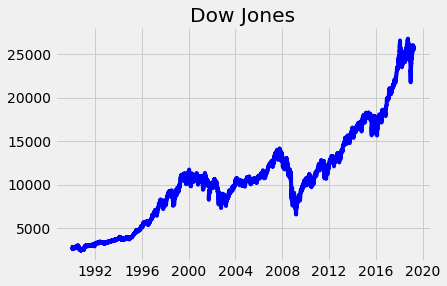

In [140]:
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

style.use('fivethirtyeight')
fig, ax = plt.subplots()
ax.plot_date(x=combined['Date'], y=combined['Close'], markersize=0, linestyle='-', color='blue')
ax.set_title('Dow Jones')
ax.spines['top'].set_visible(False)

A simple visualization of the Dow Jones Industrial Average shows us we should be looking specifically for inversions in the late 90s and before the '08 financial crisis.

## Analyze data by years to identify trends

In [134]:
# Group by year to further analyze
combined['Year'], combined['Month'], combined['Day'] = combined['Date'].dt.year, combined['Date'].dt.month, combined['Date'].dt.day

#### Filter for dates with yield curve inversions

In [88]:
# Find inversions
inverted = combined['three_month'] - combined['ten_year'] > 0
inversions = combined[inverted]
combined['inverted?'] = inverted
inversions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 2175 to 7308
Data columns (total 8 columns):
Date           385 non-null datetime64[ns]
three_month    385 non-null float64
ten_year       385 non-null float64
Open           383 non-null float64
Close          383 non-null float64
Year           385 non-null int64
Month          385 non-null int64
Day            385 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 27.1 KB


In [89]:
# Group by Year and then Month
inversions_year_groups = inversions.groupby('Year').count()
inversions_year_groups.head()

,Date,three_month,ten_year,Open,Close,Month,Day
Year,,,,,,,
1998,5,5,5,5,5,5,5
2000,122,122,122,122,122,122,122
2001,14,14,14,14,14,14,14
2006,124,124,124,124,124,124,124
2007,119,119,119,117,117,119,119


Filtering for dates with yield curve inversions shows that inversions only occured in 5 years out of the last 29. We'll analyse three separate periods:
-  1998
-  2000-2001
-  2006-2007

In [90]:
# Separate data by year to examine specifics within each
inversions_1998 = inversions[inversions['Year'] == 1998]
inversions_2000 = inversions[inversions['Year'] == 2000]
inversions_2001 = inversions[inversions['Year'] == 2001]
inversions_2006 = inversions[inversions['Year'] == 2006]
inversions_2007 = inversions[inversions['Year'] == 2007]

## 1998

In [91]:
# Explore 1998
inversions_1998

,Date,three_month,ten_year,Open,Close,Year,Month,Day
2175,1998-09-10,4.78,4.76,7858.069824,7615.540039,1998,9,10
2176,1998-09-11,4.87,4.85,7612.180176,7795.500000,1998,9,11
2182,1998-09-21,4.82,4.69,7889.330078,7933.250000,1998,9,21
2183,1998-09-22,4.81,4.73,7934.279785,7897.200195,1998,9,22
2192,1998-10-05,4.23,4.16,7787.009766,7726.240234,1998,10,5


Only five dates in 1998 had yield curve inversions: 4 in September and 1 in early October

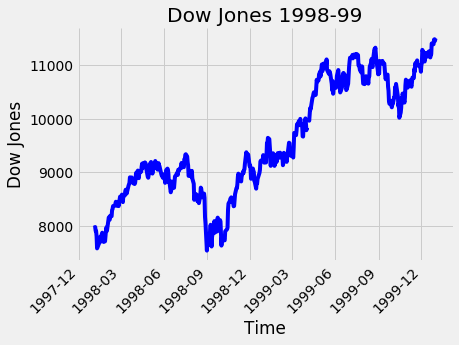

In [119]:
# Select data from 1998 and 1999 to observe market trends around time of yield inversions
dow_98_99 = combined[(combined['Year'] == 1998) | (combined['Year'] == 1999)]

# Plot results
fig, ax = plt.subplots()
ax.plot_date(x=dow_98_99['Date'], y=dow_98_99['Close'], markersize=0, linestyle='-', color='blue')
plt.xticks(rotation=45, ha='right')
ax.set_title('Dow Jones 1998-99')
ax.set_ylabel('Dow Jones')
ax.set_xlabel('Time')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Closing prices of the DJIA during the 1998-1999 period show one significant market decline from ~9500 to ~7500 (-21%) which appears to have reached its trough in early September. We'll zoom into this area to confirm.

In [141]:
# Select data from June - Dec 1998 to observe market trends at the specific time surrounding yield inversions
zoom_98 = dow_98_99[dow_98_99['Year'] == 1998]

# Import datetime module to use for comparing dates
import datetime as dt
zoom_98 = zoom_98[(zoom_98['Date'] > dt.datetime(1998, 5, 31)) & (zoom_98['Date'] < dt.datetime(1999, 1, 1))]

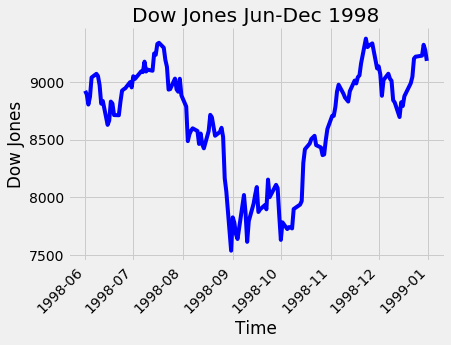

In [142]:
# Plot

fig, ax = plt.subplots()
ax.plot_date(x=zoom_98['Date'], y=zoom_98['Close'], linestyle='-', markersize=0, color='blue')
plt.xticks(rotation=45, ha='right')
ax.set_title('Dow Jones Jun-Dec 1998')
ax.set_ylabel('Dow Jones')
ax.set_xlabel('Time')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [143]:
# Find bottom of market
zoom_98_low = zoom_98[zoom_98['Close'] == zoom_98['Close'].min()]
zoom_98_low

,Date,three_month,ten_year,Open,Close,Year,Month,Day,inverted?
2168,1998-08-31,4.96,5.05,8052.450195,7539.069824,1998,8,31,False


## 1998 Analysis
Confirming what was suspected from earlier analysis, the bottom of the crash during late 1998 occured on August 31, before any yield curve inversions were seen. This potentially indicates that investors did not foresee the market drop and only became wary after the worst was over for that particular crash. No recession followed these inversions, so there is evidence to avoid fully trusting the claim made in the financial press. 

The graph does show, however, another dip at the end of September that nearly reaches the August 31 low. Perhaps the yield inversion is predictive of that dip, but that explanation appears insufficient in the face of the much larger drop preceeding the inversions. 

## 2000-2002: Dotcom
The Dotcom bubble and crash are synonymous in financial markets with the turn of the century. The data are clearly very talkative during this period: The year 2000 has a total of 122 days with yield curve inversions; however, 2001 has only 14. We'll explore the distribution of the data to see when before or during the crash inversions occured and if they were predictive.

In [144]:
# List inversion counts for each month
inversions_2000['Month'].value_counts()

8     23
11    21
10    21
12    20
9     20
7     15
4      2
Name: Month, dtype: int64

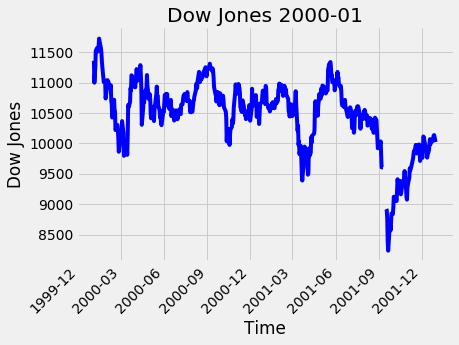

In [146]:
# Plot Dow for the period of interest
fig, ax = plt.subplots()
ax.plot_date(x=dow_00_01['Date'], y=dow_00_01['Close'], linestyle='-', markersize=0, color='blue')
plt.xticks(rotation=45, ha='right')
ax.set_title('Dow Jones 2000-01')
ax.set_ylabel('Dow Jones')
ax.set_xlabel('Time')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

The Dow Jones does not fully show the damage done during the Dotcom bubble crash. Since the NASDAQ is a much more representative tech index, we'll plot its market moves as well.

In [99]:
# read in Nasdaq info
nasdaq = pd.read_csv('nasdaq_dot_com.csv')
nasdaq.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/3/00,4186.189941,4192.189941,3989.709961,4131.149902,4131.149902,1510070000
1,1/4/00,4020.000000,4073.250000,3898.229980,3901.689941,3901.689941,1511840000
2,1/5/00,3854.350098,3924.209961,3734.870117,3877.540039,3877.540039,1735670000
3,1/6/00,3834.439941,3868.760010,3715.620117,3727.129883,3727.129883,1598320000
4,1/7/00,3711.090088,3882.669922,3711.090088,3882.620117,3882.620117,1634930000


In [100]:
# Clean data
nasdaq['Date'] = pd.to_datetime(nasdaq['Date'], format='%m/%d/%y')
nasdaq['Year'] = nasdaq['Date'].dt.year
nasdaq = nasdaq[['Date', 'Open', 'Close', 'Year']]
nasdaq.head()

,Date,Open,Close,Year
0,2000-01-03,4186.189941,4131.149902,2000
1,2000-01-04,4020.000000,3901.689941,2000
2,2000-01-05,3854.350098,3877.540039,2000
3,2000-01-06,3834.439941,3727.129883,2000
4,2000-01-07,3711.090088,3882.620117,2000


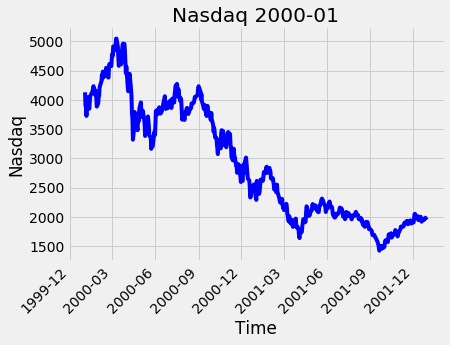

In [150]:
#Plot Nasdaq data
nasdaq_00 = nasdaq[(nasdaq['Year'] == 2000) | (nasdaq['Year'] == 2001)]
fig, ax = plt.subplots()
ax.plot_date(x=nasdaq_00['Date'], y=nasdaq_00['Close'], linestyle='-', markersize=0, color='blue')
plt.xticks(rotation=45, ha='right')
ax.set_title('Nasdaq 2000-01')
ax.set_ylabel('Nasdaq')
ax.set_xlabel('Time')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

This graph clearly shows the sharp correction in Q2 2001 followed by a further downward slide later in the year. The market stabalizes a bit during early 2001 and starts its upward march near the end. We can investigate the first drop to determine if yield inversions preceed the drop or proceeded from it. 

In [102]:
# Select data from first 4 months of 2000
early_nasdaq_00 = nasdaq[nasdaq['Date'] < dt.datetime(2000, 5, 1)]
print('Peak: ')
print(early_nasdaq_00[early_nasdaq_00['Close'] == early_nasdaq_00['Close'].max()])
print()
print('Low: ')
print(early_nasdaq_00[early_nasdaq_00['Close'] == early_nasdaq_00['Close'].min()])

Peak: 
         Date         Open        Close  Year
47 2000-03-10  5060.339844  5048.620117  2000

Low: 
         Date         Open        Close  Year
72 2000-04-14  3597.439941  3321.290039  2000


In [103]:
inversions_2000[inversions_2000['Month'] == 4]

,Date,three_month,ten_year,Open,Close,Year,Month,Day
2570,2000-04-07,5.90,5.86,11122.03027,11111.48047,2000,4,7
2571,2000-04-10,5.85,5.80,11114.88965,11186.55957,2000,4,10


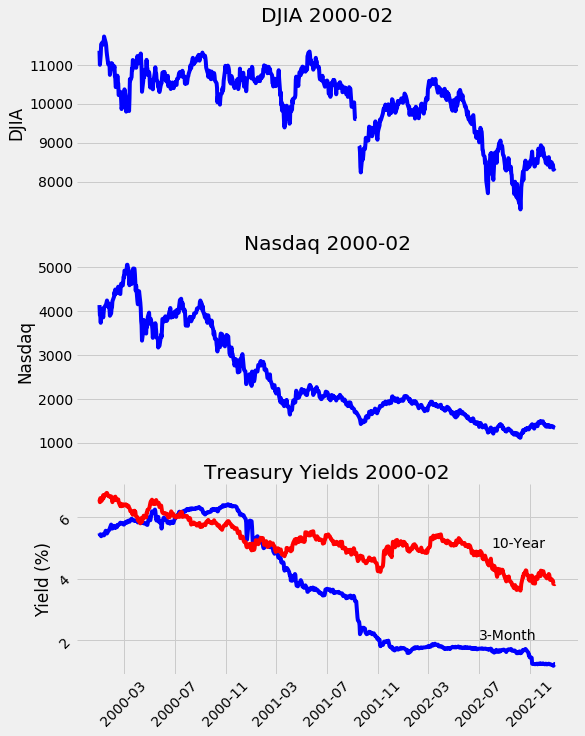

In [159]:
# Select years in 2001-02
dates_00_02 = combined.loc[(combined['Year'] > 1999) & (combined['Year'] < 2003)]

#plot
fig = plt.figure(figsize=(8, 15))
# plt.xticks(rotation=45, ha='right')

ax1 = fig.add_subplot(4, 1, 1)
ax1.plot_date(x=dates_00_02['Date'], y=dates_00_02['Close'], linestyle='-', markersize=0, color='blue')
ax1.set_title('DJIA 2000-02')
ax1.set_ylabel('DJIA')
ax1.set_xticks([])
for key, spine in ax1.spines.items():
    spine.set_visible(False)
    
ax4 = fig.add_subplot(4, 1, 2)
ax4.plot_date(x=nasdaq['Date'], y=nasdaq['Close'], linestyle='-', markersize=0, color='blue')
ax4.set_title('Nasdaq 2000-02')
ax4.set_ylabel('Nasdaq')
ax4.set_xticks([])
for key, spine in ax4.spines.items():
    spine.set_visible(False)

ax2 = fig.add_subplot(4, 1, 3)
ax2.plot('Date', 'three_month', data=dates_00_02, color='blue')
ax2.plot('Date', 'ten_year', data=dates_00_02, color='red')
ax2.set_title('Treasury Yields 2000-02')
ax2.set_ylabel('Yield (%)')
ax2.text(dt.datetime(2002, 7, 31), 5, '10-Year')
ax2.text(dt.datetime(2002, 7, 1), 2, '3-Month')
ax2.tick_params(labelrotation=45)
for key, spine in ax2.spines.items():
    spine.set_visible(False)

# inverted_00_02 = dates_00_02['inverted?']
# ax3 = fig.add_subplot(4, 1, 4)
# ax3.scatter(x=dates_00_02['Date'], y=inverted_00_02)
# ax3.set_title('Yield Inversions')
# ax3.set_ylabel('1=True, 0=False')
# ax3.set_xlabel('Time')
# for key, spine in ax3.spines.items():
#     spine.set_visible(False)

## Dotcom Analysis

In early 2000, the Dotcom bubble reached its peak on March 3. The Nasdaq varied for a few days before its initial crash that troughed on April 14th. Well into the course of this slide, the first yield curve inversion appeared on April 7 before reversing for two days and then occuring on April 10.

Plotting the DJIA and Nasdaq over the 2000-2002 period shows us the full decline of the market, particularly pronounced in the tech-heavy Nasdaq. Plotted alongside a historical visualization of yield curve inversions we can see that the extended period of inversion during the second half of 2000 coincided with the begining of the recession. However, the vizualizations do not make clear whether the inversions preceeded, simply coincided with, or proceed from the slide. We'll zoom into this period to try and discover any additional information.

In [105]:
nasdaq.head()

,Date,Open,Close,Year
0,2000-01-03,4186.189941,4131.149902,2000
1,2000-01-04,4020.000000,3901.689941,2000
2,2000-01-05,3854.350098,3877.540039,2000
3,2000-01-06,3834.439941,3727.129883,2000
4,2000-01-07,3711.090088,3882.620117,2000


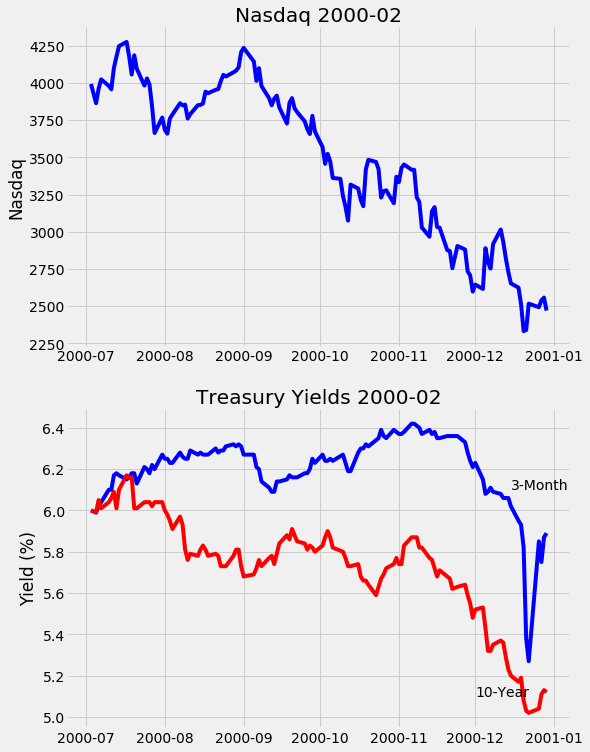

In [113]:
fig = plt.figure(figsize=(8, 12))

nasdaq_00 = nasdaq[nasdaq['Year'] == 2000]
nasdaq_later_00 = nasdaq_00[nasdaq_00['Date'].dt.month > 6]
ax4 = fig.add_subplot(2, 1, 1)
ax4.plot_date(x=nasdaq_later_00['Date'], y=nasdaq_later_00['Close'], linestyle='-', markersize=0, color='blue')
ax4.set_title('Nasdaq 2000-02')
ax4.set_ylabel('Nasdaq')
for key, spine in ax4.spines.items():
    spine.set_visible(False)

ax2 = fig.add_subplot(2, 1, 2)
dates_later_00 = combined[(combined['Year'] == 2000) & (combined['Month'] > 6)]
ax2.plot('Date', 'three_month', data=dates_later_00, color='blue')
ax2.plot('Date', 'ten_year', data=dates_later_00, color='red')
ax2.set_title('Treasury Yields 2000-02')
ax2.set_ylabel('Yield (%)')
ax2.text(dt.datetime(2000, 12, 1), 5.1, '10-Year')
ax2.text(dt.datetime(2000, 12, 15), 6.1, '3-Month')
for key, spine in ax2.spines.items():
    spine.set_visible(False)

This zoomed in view of late 2000, which saw a sustained yield curve inversion indicates that the inversions began during a small uptick in the market before the start of a lengthened downturn. During this entire bull market, the yield curve inversion persists. Of course, this was after the initial crash in March.

Return to the previous set of graphs also indicates that the return of the yield curve to normal coincides with a decelerartion of the downturn. Based on this evidence, one could potentially make a case for the predictive power of yield curve inversions. However, the data appears inconclusive.

## 2006-2007

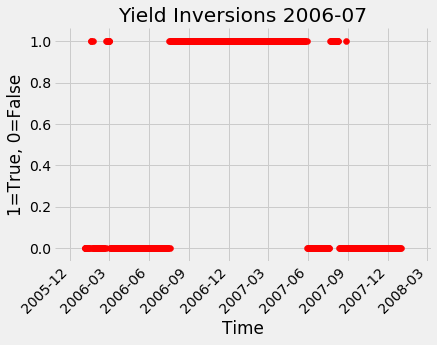

In [160]:
dates_06_07 = combined[(combined['Year'] == 2006) | (combined['Year'] == 2007)]
inverted_06_07 = dates_06_07['inverted?']
fig, ax = plt.subplots()
ax.scatter(x=dates_06_07['Date'], y=inverted_06_07, color='red')
ax.set_title('Yield Inversions 2006-07')
ax.set_ylabel('1=True, 0=False')
ax.set_xlabel('Time')
plt.xticks(rotation=45, ha='right')
for key, spine in ax.spines.items():
    spine.set_visible(False)

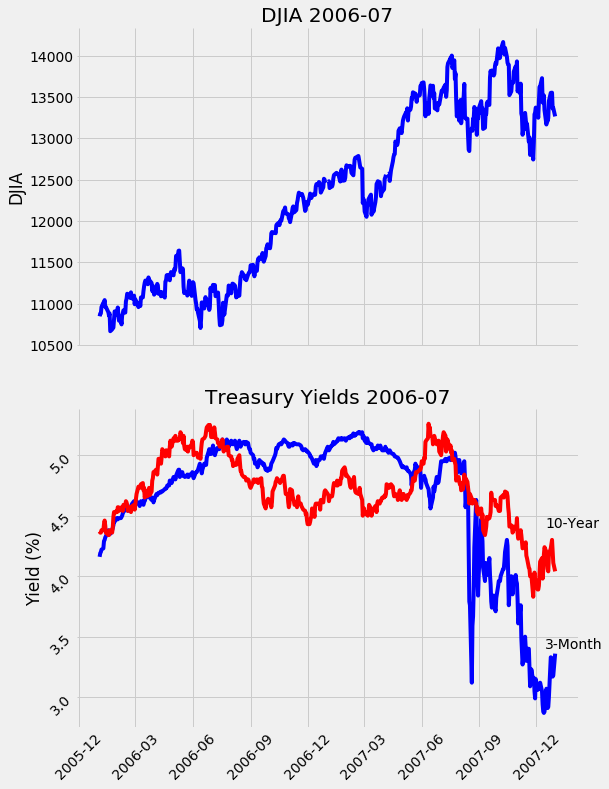

In [163]:
#plot
fig = plt.figure(figsize=(8, 12))
# plt.xticks(rotation=45, ha='right')

ax1 = fig.add_subplot(2, 1, 1)
ax1.plot_date(x=dates_06_07['Date'], y=dates_06_07['Close'], linestyle='-', markersize=0, color='blue')
ax1.set_title('DJIA 2006-07')
ax1.set_ylabel('DJIA')
ax1.set_xticklabels([])
for key, spine in ax1.spines.items():
    spine.set_visible(False)
    
# ax4 = fig.add_subplot(3, 1, 2)
# ax4.plot_date(x=nasdaq['Date'], y=nasdaq['Close'], linestyle='-', markersize=0)
# ax4.set_title('Nasdaq 2006-07')
# ax4.set_ylabel('Nasdaq')
# for key, spine in ax4.spines.items():
#     spine.set_visible(False)

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot('Date', 'three_month', data=dates_06_07, color='blue')
ax2.plot('Date', 'ten_year', data=dates_06_07, color='red')
ax2.set_title('Treasury Yields 2006-07')
ax2.set_ylabel('Yield (%)')
ax2.text(dt.datetime(2007, 12, 15), 4.4, '10-Year')
ax2.text(dt.datetime(2007, 12, 15), 3.4, '3-Month')
ax2.tick_params(labelrotation=45)
for key, spine in ax2.spines.items():
    spine.set_visible(False)

A significant period of inversion began in mid-2006 and lasted for about a year.

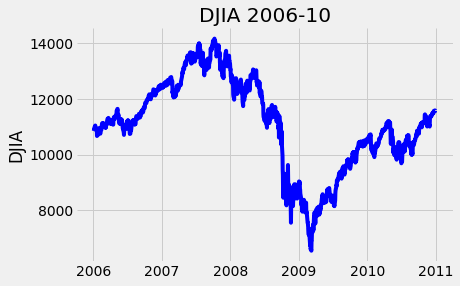

In [164]:
# plot crash
dates_06_10 = combined[(combined['Year'] > 2005) & (combined['Year'] < 2011)]
fig, ax = plt.subplots()
ax.plot_date(x=dates_06_10['Date'], y=dates_06_10['Close'], linestyle='-', markersize=0, color='blue')
ax.set_title('DJIA 2006-10')
ax.set_ylabel('DJIA')
for key, spine in ax.spines.items():
    spine.set_visible(False)
    

The crash began at the beginning of 2008, falling sharply for over a year until it reached its bottom in early 2009.

## '08 Financial Crisis Analysis
The idea suggested in the financial press is clearly seen here. The yield inversions were pronounced and defined in the years before the recession. No inversions were seen during the market downturn or during the years following the crash until now. Perhaps the recency of this example is providing bias to memories of financial journalists. The clear indication of yield curve inversion preceeding recession is perhaps being extrapolated through history.

## Conclusion
The financial press has not explicitly stated that a yield curve inversion is directly predictive of economic downturns, but they do make the suggestion that such is true. Given investors' reliance on financial press for information, such ideas should be supported with evidence if they are to be trusted. Based on this analysis the data cast doubt on the idea of using yield curves as warning signals for future recession. In some cases, the curve does invert before a recession, but in others it inverts concurrently with downturns or completely isolated from market shifts. The relationship appears unremarkable as a predictor.

Additional statistical analysis could be performed to more solidly disprove or confirm the idea. Data from earlier decades would also asist in performing a more robust analysis with a more solid conclusion.